In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import math 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [3]:
X, y = load_wine(return_X_y=True, as_frame=True)
X=X[["proline", "hue"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)



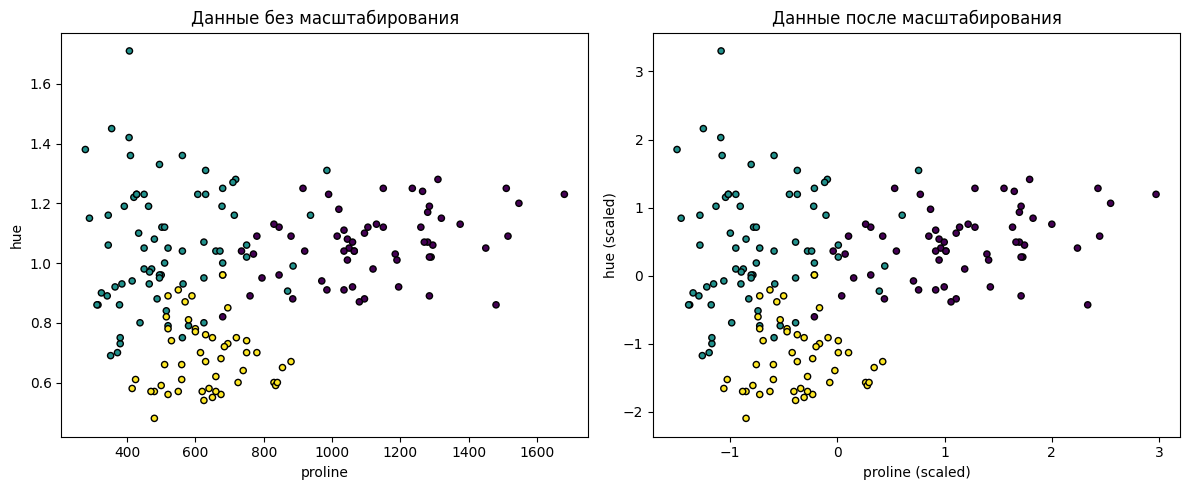

In [12]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- До масштабирования ---
axes[0].scatter(X["proline"], X["hue"], c=y, s=20, edgecolor="k")
axes[0].set_xlabel("proline")
axes[0].set_ylabel("hue")
axes[0].set_title("Данные без масштабирования")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[["proline", "hue"]])

axes[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y, s=20, edgecolor="k")
axes[1].set_xlabel("proline (scaled)")
axes[1].set_ylabel("hue (scaled)")
axes[1].set_title("Данные после масштабирования")

plt.tight_layout()
plt.show()

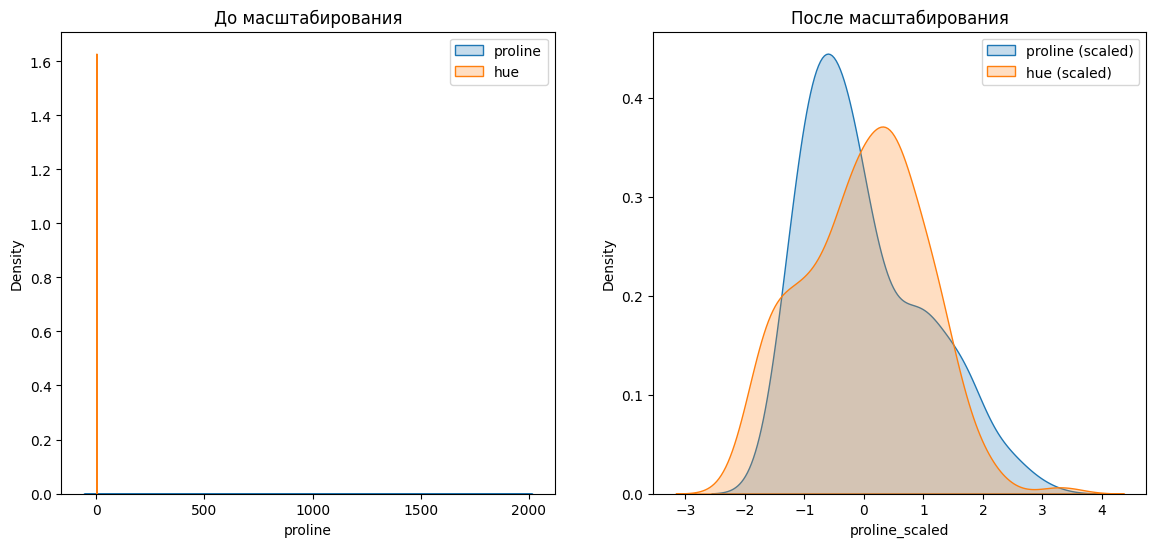

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(X["proline"], fill=True, ax=axes[0], label="proline")
sns.kdeplot(X["hue"], fill=True, ax=axes[0], label="hue")
axes[0].set_title("До масштабирования")
axes[0].legend()

# После масштабирования
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[["proline", "hue"]])
X_scaled = pd.DataFrame(X_scaled, columns=["proline_scaled", "hue_scaled"])

sns.kdeplot(X_scaled["proline_scaled"], fill=True, ax=axes[1], label="proline (scaled)")
sns.kdeplot(X_scaled["hue_scaled"], fill=True, ax=axes[1], label="hue (scaled)")
axes[1].set_title("После масштабирования")
axes[1].legend()

plt.show()

In [19]:
def fit_and_plot_model(X_plot, y, clf):
    fig, ax = plt.subplots(ncols=1, figsize=(7, 6)) 
    
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_

In [18]:
from sklearn.inspection import DecisionBoundaryDisplay


75.93%



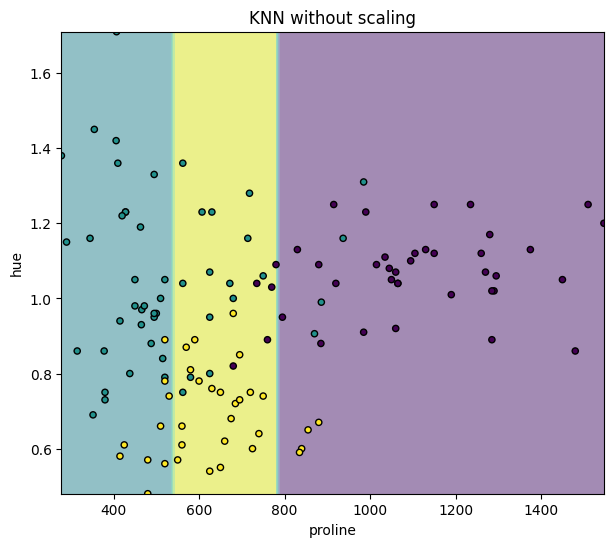

In [20]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

disp= fit_and_plot_model(X_train, y_train, clf)
disp.set_title("KNN without scaling")

print(f"{accuracy_score(y_test, y_pred):.2%}\n")

96.30%



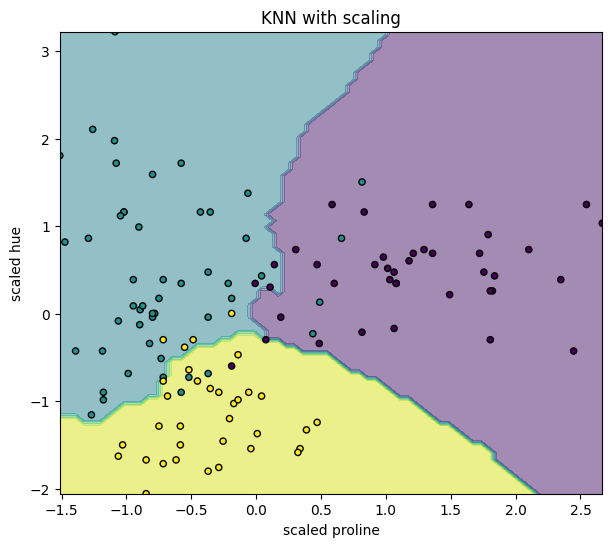

In [21]:
scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)
clf.fit(scaled_X_train, y_train)
y_pred = clf.predict(scaled_X_test)
disp= fit_and_plot_model(scaled_X_train, y_train, clf)
disp.set_title("KNN with scaling")
disp.set_xlabel("scaled proline")
disp.set_ylabel("scaled hue")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")


In [97]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

data_X=np.array([[900,1.4],[1105,0.9]])
data_y=np.array([0,1])
test_X=np.array([[1000,1.0]])

data_scaled = scaler.fit_transform(data_X)
test_scaled=scaler.transform(test_X)
d_qA = euclidean(test_X[0], data_X[0])
d_qB = euclidean(test_X[0], data_X[1])
print(f"Расстояние до A: {d_qA:.4f}")
print(f"Расстояние до B: {d_qB:.4f}")
print("Ближе:", "A (класс 0)" if d_qA < d_qB else "B (класс 1)")

Расстояние до A: 100.0008
Расстояние до B: 105.0000
Ближе: A (класс 0)


In [98]:
d1_qA = euclidean(test_scaled[0], data_scaled[0])
d1_qB = euclidean(test_scaled[0], data_scaled[1])
print(f"Расстояние до A: {d1_qA:.4f}")
print(f"Расстояние до B: {d1_qB:.4f}")
print("Ближе:", "A (класс 0)" if d1_qA < d1_qB else "B (класс 1)")

Расстояние до A: 1.8740
Расстояние до B: 1.0997
Ближе: B (класс 1)


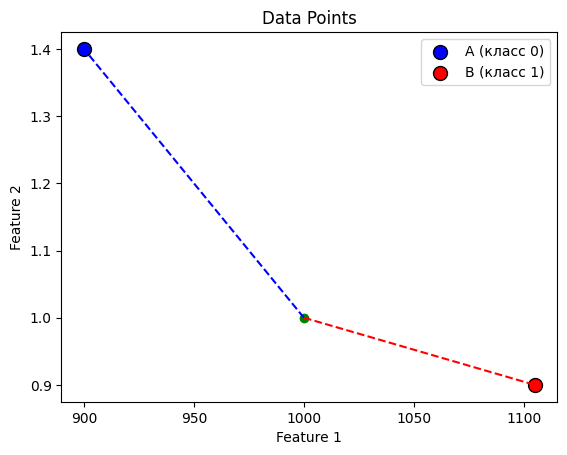

In [91]:

plt.scatter(data_X[0, 0], data_X[0, 1], c='blue', s=100, edgecolors='k', label="A (класс 0)")
plt.scatter(data_X[1, 0], data_X[1, 1], c='red', s=100, edgecolors='k', label="B (класс 1)")

plt.scatter(test_X[:,0],test_X[:,1],color="green")

plt.plot([test_X[0, 0], data_X[0, 0]], [test_X[0, 1], data_X[0, 1]], 'b--')
plt.plot([test_X[0, 0], data_X[1, 0]], [test_X[0, 1], data_X[1, 1]], 'r--')


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Points")
plt.legend()


plt.show()

In [129]:
X=np.array([10,11,9,10,100])
print(X)
print(X.std(),X.mean())
X_scaled = scaler.fit_transform(X.reshape(-1,1))
print(X_scaled)
print(X_scaled.std(),X_scaled.mean())

[ 10  11   9  10 100]
36.00555512695229 28.0
         x0
0 -0.499923
1 -0.472149
2 -0.527696
3 -0.499923
4  1.999691
x0    1.118034
dtype: float64 x0    0.0
dtype: float64


In [24]:
def GD_multi(x,y,alpha=0.001,iter=100):
    n_samples, n_features = x.shape  
    
    theta = np.array([-7,-10])
    trajectory = [(theta[0],theta[1])]
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient
        trajectory.append((theta[0],theta[1]))
            
                
    return theta,trajectory

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))
    
def mse_loss(w0, w1, x1,x2, y):
    y_pred = w0 * x1 + w1 * x2 
    return np.mean((y - y_pred) ** 2)

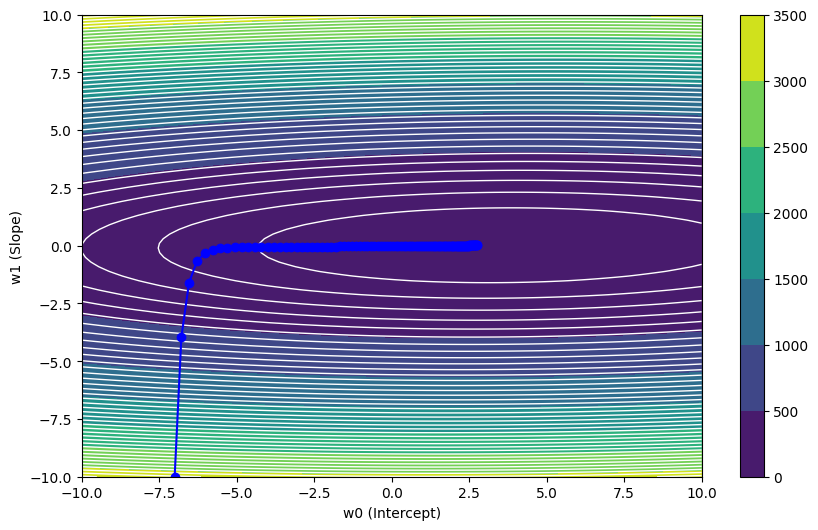

In [31]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*5
w1 = 3.5  
w2 = 0.02 
y = w1 * x1 + w2 * x2 
X=np.column_stack((x1,x2))



w,trajectory=GD_multi(X,y,iter=100,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1,x2, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [27]:
def z_score_scaling(data):
    mean = np.mean(data,axis=0)
    std_dev = np.std(data,axis=0)
    scaled_data = (data-mean)/std_dev
    return scaled_data
    

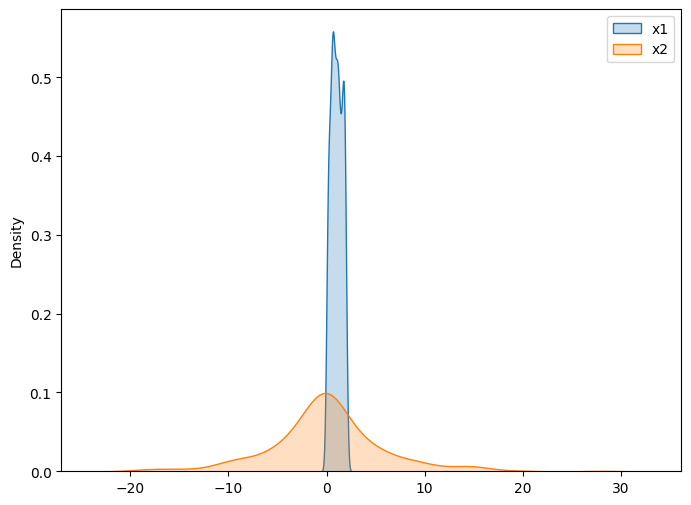

In [28]:
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1, label="x1", fill=True)
sns.kdeplot(x=x2, label="x2", fill=True)
plt.legend()
plt.show()

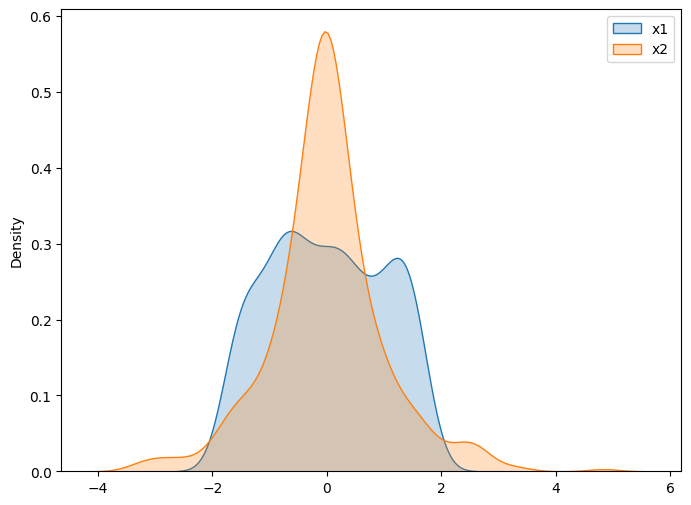

In [29]:
x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

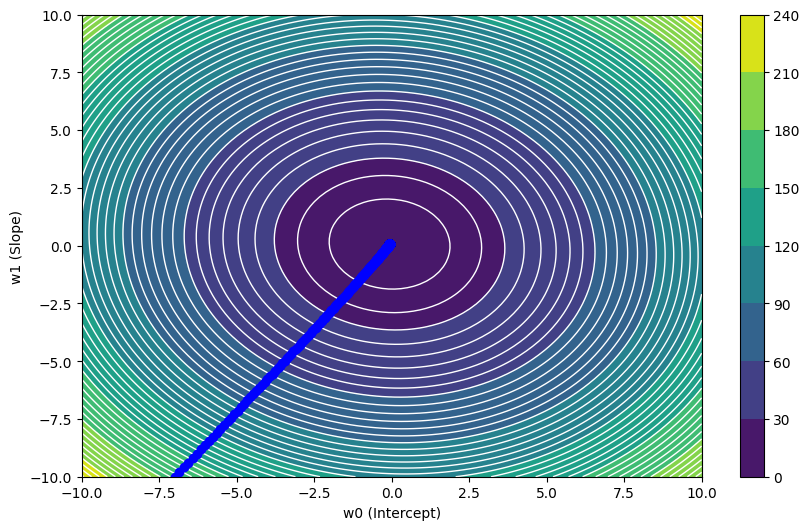

In [30]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)

X=np.column_stack((x1_scaling,x2_scaling))



w,trajectory=GD_multi(X,y,iter=500,alpha=0.01)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [32]:
def Mean_Normal(data):    
    mean = np.mean(data, axis=0)
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)    
    normalized_data = (data - mean) / (max_val - min_val)
    
    return normalized_data

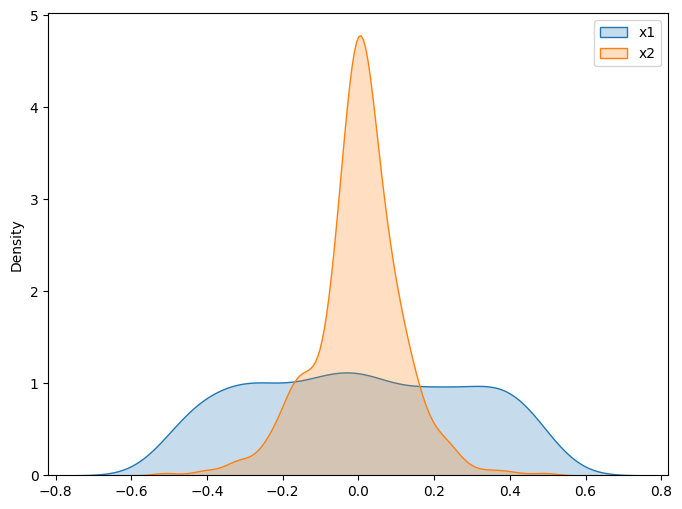

In [33]:
x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

In [34]:
def MaxScaling(data):
    max_val= np.max(data,axis=0)
    normalized_data= data / np.abs(max_val)    
    return normalized_data

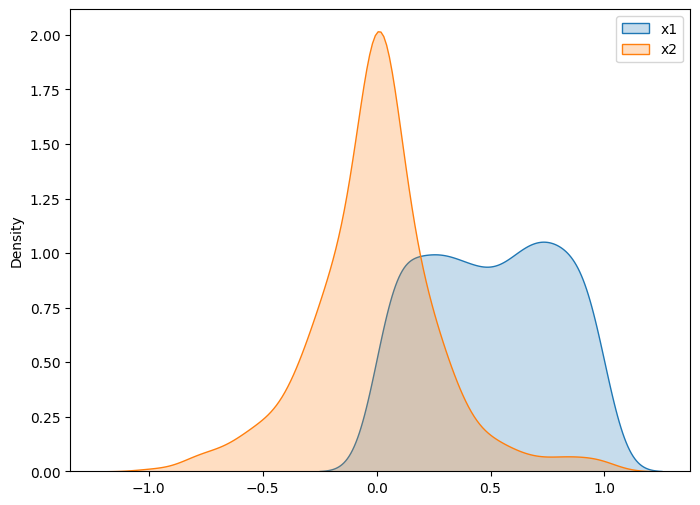

In [139]:
x1_scaling=MaxScaling(x1)
x2_scaling=MaxScaling(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

## Градиентный спуск (Gradient descent)

In [35]:
from sklearn.linear_model import SGDRegressor

n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate='constant',eta0=0.01)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.24294715 -0.04233619 -0.28749564  0.01495629 -0.20512582] , [-0.16006618]
Среднеквадратичная ошибка: 1.4554532526458304


## Invscaling

$$ \eta(t) = \frac{\eta_0}{t^{power\_t}} $$


In [36]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate='invscaling',eta0=0.01,power_t=0.25)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[ 0.02814997  0.06513744 -0.06985075  0.06824241 -0.07297218] , [0.02523292]
Среднеквадратичная ошибка: 1.1439126564239686


$$
\eta_t = \frac{1}{\alpha\,(t_0 + t)}, \quad
t_0 = \frac{1}{\eta_0 \cdot \alpha}
$$

-   𝛼 — параметр регуляризации (alpha в SGDRegressor),
-   𝑡 — номер итерации,
-   𝑡0 — величина, зависящая от начального шага (eta0).

In [37]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, learning_rate="optimal",alpha=0.0001,eta0=0.001,)
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[ 1.43638748e+12  4.93972678e+12  4.53667387e+12  6.79528898e+12
 -4.86287922e+12] , [-2.43626346e+12]
Среднеквадратичная ошибка: 1.4469408996637033e+26


In [38]:
rng = np.random.default_rng(0)
n, d = 1000, 2
X = rng.normal(size=(n, d))
y = 3*X[:,0] - 2*X[:,1] + 1 + rng.normal(scale=0.5, size=n)

sgd = SGDRegressor(
    learning_rate="optimal",  
    alpha=1e-4,
    random_state=0
)


epochs = 5
for _ in range(epochs):
    idx = rng.permutation(n)
    for i in idx:
        sgd.partial_fit(X[i:i+1], y[i:i+1])  # один объект

print("SGD  coeff_:", sgd.coef_, "  intercept_:", sgd.intercept_)
print("SGD  MSE:", mean_squared_error(y, sgd.predict(X)))

SGD  coeff_: [4.61141394e+11 8.92049456e+10]   intercept_: [-1.15616254e+12]
SGD  MSE: 1.6012033136152018e+24


In [147]:
rng = np.random.default_rng(0)
n, d = 1000, 2
X = rng.normal(size=(n, d))
y = 3*X[:,0] - 2*X[:,1] + 1 + rng.normal(scale=0.5, size=n)

mb = SGDRegressor(
    learning_rate="optimal",
    alpha=1e-4,
    random_state=0
)

batch_size = 64
epochs = 10
for _ in range(epochs):
    idx = rng.permutation(n)
    for start in range(0, n, batch_size):
        batch = idx[start:start+batch_size]
        mb.partial_fit(X[batch], y[batch])  
        

print("Mini-batch coeff_:", mb.coef_, "  intercept_:", mb.intercept_)
print("Mini-batch MSE:", mean_squared_error(y, mb.predict(X)))

Mini-batch coeff_: [-4.05981664e+11  7.46793371e+11]   intercept_: [-4.92416238e+11]
Mini-batch MSE: 9.696502227688593e+23


In [ ]:
#StandardScaler (Z-score стандартизация)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#MinMaxScaler (MinMax-масштабирование)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))  # можно задать (−1,1)
X_scaled = scaler.fit_transform(X)

In [ ]:
#MaxAbsScaler (Масштабирование по максимуму)
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#RobustScaler (устойчив к выбросам)
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def batch_gd(Xb, y, lr=0.05, epochs=200):
    wb = np.zeros(Xb.shape[1])
    for _ in range(epochs):
        r = Xb @ wb - y
        grad = (Xb.T @ r) / len(y)
        wb -= lr * grad
    return 

## SGD with L1

In [148]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, alpha=0.00001,penalty="l1")
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.21427138  0.04200693 -0.14788599 -0.09663637 -0.05097017] , [-0.0766188]
Среднеквадратичная ошибка: 1.0429132048523198


## SGD with L2

In [149]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, alpha=0.00001,penalty="l2")
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

[-0.12503729 -0.12604765 -0.17012026 -0.06939182 -0.06154387] , [0.05079941]
Среднеквадратичная ошибка: 1.1788417343451578


## Elastic Net 

In [ ]:
n_samples, n_features = 100, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
                                                    
model= SGDRegressor(max_iter=10000, alpha=0.00001,l1_ratio=0.5,penalty="elasticnet")
model.fit(X_train,y_train)
print(f"{model.coef_} , {model.intercept_}")

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f"Среднеквадратичная ошибка: {mse}")